<a href="https://colab.research.google.com/github/amoghpai17/Telecom_churn_EDA/blob/main/Telecom_churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Telecom Churn Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name-** Amogh pai K

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/amoghpai17/Telecom_churn_EDA

# **Problem Statement**


Orange S.A., formerly France Telecom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key f**actors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [39]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sympy import symbols, Eq, solve
import warnings
warnings.filterwarnings("ignore")
import missingno as msno


### Dataset Loading

In [40]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Telecom_churn/Telecom Churn.csv')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [42]:
# Dataset First Look
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### Dataset Rows & Columns count

In [43]:
# Dataset Rows & Columns count
rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')



The dataset has 3333 rows and 20 columns.


### Dataset Information

In [44]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Duplicate Values

In [45]:
# Dataset Duplicate Value Count
mask = df.duplicated()
duplicate_count = mask.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')



The dataset has 0 duplicate rows.


#### Missing Values/Null Values

In [46]:
# Missing Values/Null Values Count
df.isnull().values.sum()

0

<AxesSubplot:>

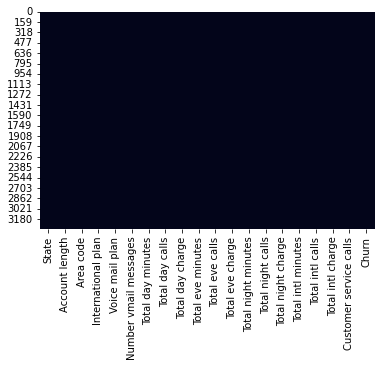

In [47]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)



### What did you know about your dataset?

## As we can see from the output , there is no missing / null data  in our dataset

## Now that we have taken care of null values .lets turn our attention to churn values .

## Churning in Telecom industry refers to not extending the company services 

## **Churn** = False means the customer did not leave the company .

## **Churn** = True means that the customer left the company . 

## ***2. Understanding Your Variables***

In [48]:
# Dataset Columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [49]:
# Dataset Describe
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### Variables Description 

* **State                :**categorica for the 50 states

* **Account Length       :**how long account has been active

* **Area Code            :**Code Number of Area having some States included in each area code

* **lntl Plan            :**Internat ional plan activated ( yes, no )

* **VMail Plan           :**  ice Mail plan activated ( yes ,no )

* **VMail Message        :**No.of voice mail messages

* **Day Mins             :**Total day minutes used

* **Day calls**         :Total day calls made

* **Day Charge**         :Total day charge

* **Eve Mins**          :Total evening minutes

* **Eve Calls**          :Total evening calls

* **Eve Charge**         :Total evening charge

* **Night Mins**         :Total night minutes

* **Night Calls**        :Total night calls

* **Night Charge**      :Total night charge

* **Intl Mins**         :Total International minutes used

* **Intl Calls**         :Total International calls made

* **Intl Charge**        :Total International charge

* **CustServ calls**    :Number of customer service caUs made

* **Churn**             :Customer churn (Target Variable True=1, False=0)

### Check Unique Values for each variable.

In [50]:
# Check Unique Values for each variable.
for col in df.columns:
    unique_values = df[col].nunique()
    print(col, unique_values)

State 51
Account length 212
Area code 3
International plan 2
Voice mail plan 2
Number vmail messages 46
Total day minutes 1667
Total day calls 119
Total day charge 1667
Total eve minutes 1611
Total eve calls 123
Total eve charge 1440
Total night minutes 1591
Total night calls 120
Total night charge 933
Total intl minutes 162
Total intl calls 21
Total intl charge 162
Customer service calls 10
Churn 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [51]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

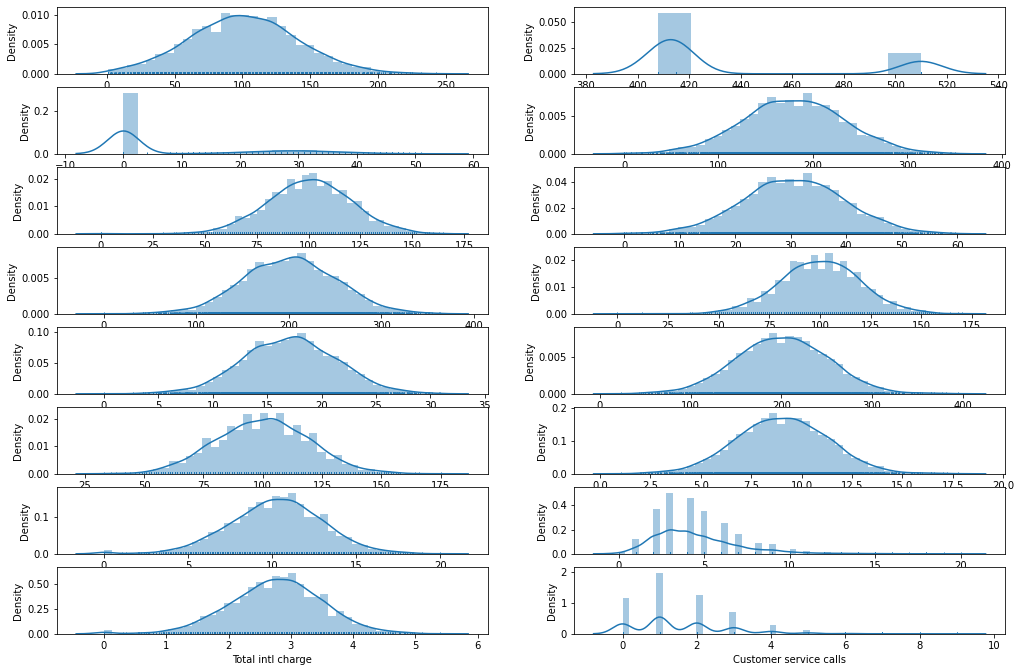

In [59]:
# Chart - 1 visualization code

#Getting the columns which are  of float and int datatype
col=df.select_dtypes(include=['float64','int64'])
col=list(col)
len(col)

#Understanding the distribution of variables using distplot
plt.figure(figsize =(17,13))
for i in range(len(col)):
  plt.subplot(9,2,i+1)
  sns.distplot(df[col[i]], hist=True, rug=True)

##### 1. Why did you pick the specific chart?

Can be used to plot the distribution of a single variable in a dataset.can also be used to check if a variable follows a normal distribution. A normal distribution is a common assumption in many statistical analyses, and distplot can help you determine if your data fits this assumption.

##### 2. What is/are the insight(s) found from the chart?

Central tendency: The normal distribution is symmetrical, with the mean and median being equal. Therefore, the peak of the distribution can be used to identify the central tendency of the churn rate data.
Spread of data: The width of the normal distribution indicates the spread of the churn rate data. A narrow distribution indicates that the majority of customers have similar churn rates, while a wider distribution indicates that churn rates vary widely among customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Retention strategies: By understanding the central tendency and spread of churn rate data, telecom companies can develop targeted retention strategies for customers who are at risk of churning. This can include personalized offers and incentives to encourage them to stay with the company.

Customer segmentation: By analyzing the distribution of churn rates, telecom companies can segment their customers based on their likelihood of churning. This can help companies tailor their marketing and retention efforts to specific customer groups and improve their overall customer experience.

There are some cases where they could potentially lead to negative growth. 

Over-reliance on retention strategies: If a telecom company focuses too heavily on retaining customers who are at risk of churning, they may neglect other areas of their business that require attention, such as improving their product or service offerings. This could lead to negative growth over time, as customers may ultimately leave the company due to factors beyond retention incentives.

Misinterpretation of data: It's important to interpret the insights gained from analyzing churn rate data correctly. If a company misinterprets the data, they may make decisions based on inaccurate assumptions, which could ultimately harm their business.

#### Chart - 2

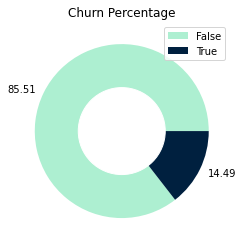

In [60]:
# Chart - 2 visualization code
df_count = (df.Churn.value_counts())
df_count
total = sum(df_count)
data_per = (df_count)/total*100
plt.pie(data_per, labels = [round(i,2) for i in (list(data_per))],colors=['#adefd1ff','#00203fff'])
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.legend(labels=['False','True'])
plt.title('Churn Percentage')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [56]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

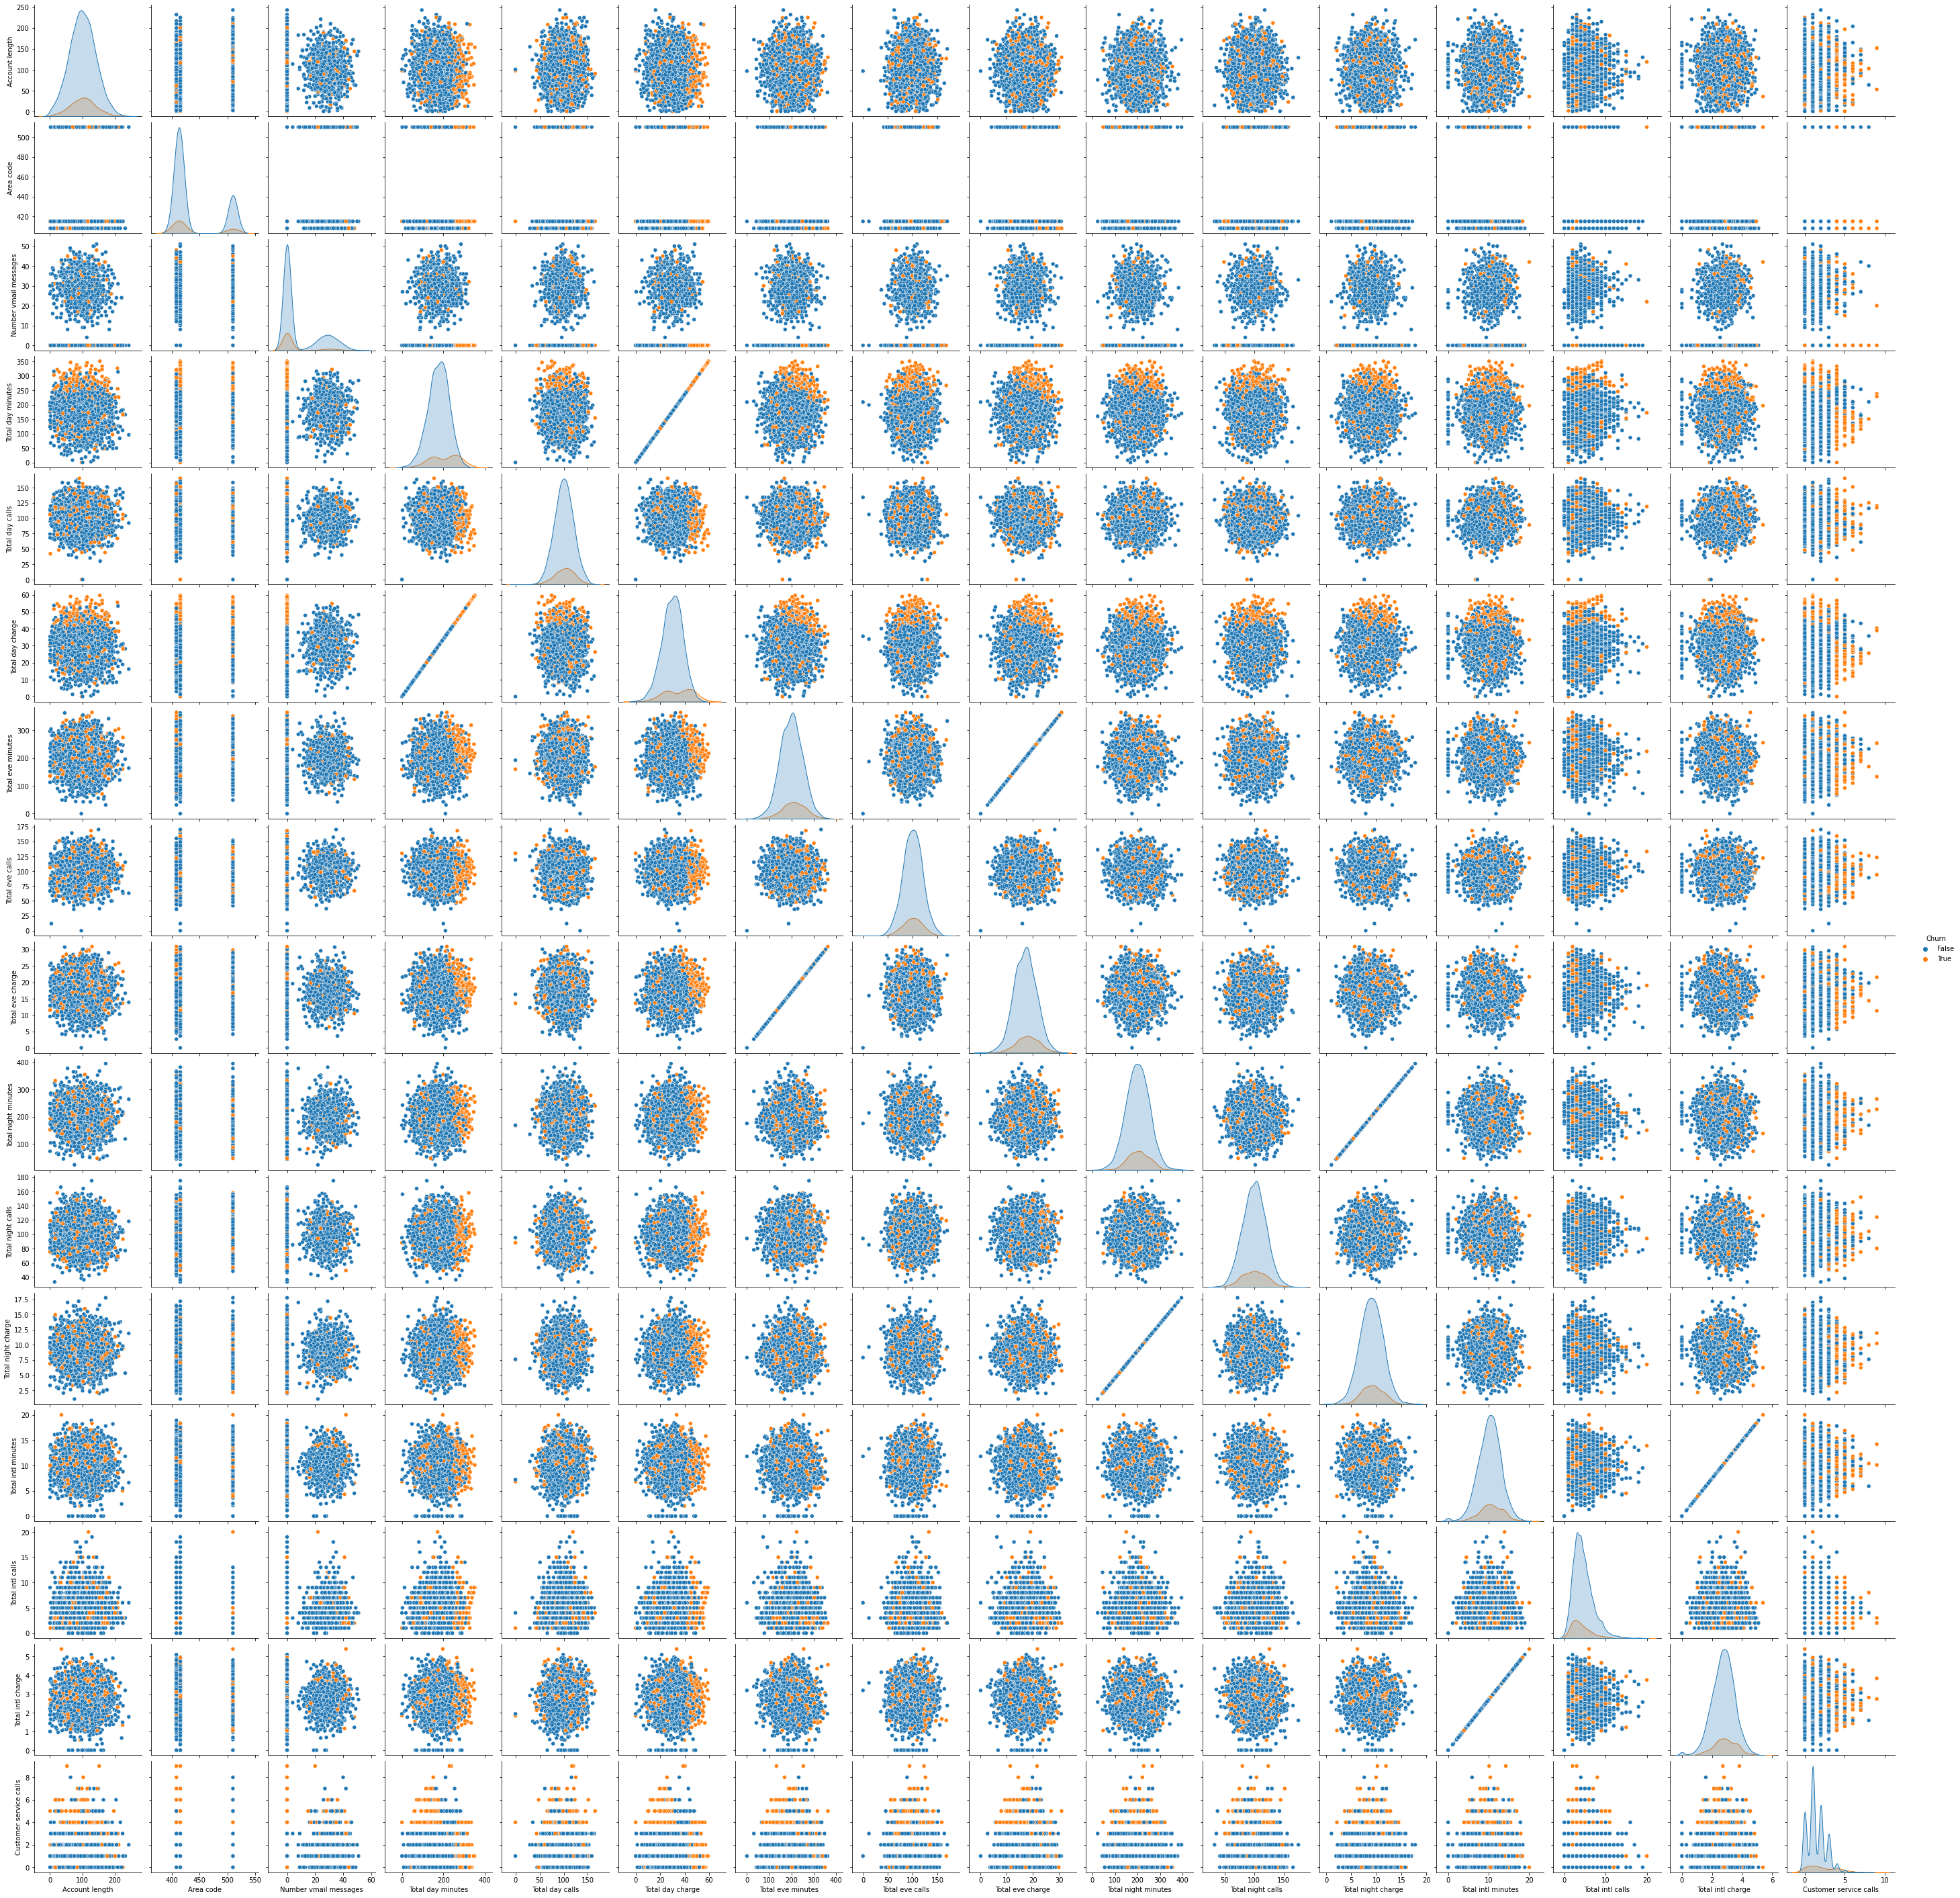

In [55]:
# Pair Plot visualization code
sns.pairplot(df,hue='Churn')

##### 1. Why did you pick the specific chart?

 Pairplots can help identify correlations between different variables in a dataset. Correlated variables are plotted close together on the diagonal of the pairplot, and can indicate a positive or negative correlation between the variables.

 Pairplots are a useful way to visualize high-dimensional data by reducing the dimensionality of the data to two dimensions. This can make it easier to identify patterns and relationships between variables in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***